<a href="https://colab.research.google.com/github/HugoLeda/machine_learning/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [3]:
!pip install wget
!wget https://bit.ly/4a5Cvgs

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=38a2b3cb397db6178fccaec027d7794ea9161de03d4879eca9d15a37f4a37f95
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2024-03-21 00:44:04--  https://bit.ly/4a5Cvgs
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv [following]
--2024-03-21 00:44:04--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|1

In [5]:
df = pd.read_csv("4a5Cvgs")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
motores = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]

print(motores.head(), '\n\n', co2.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5 

    CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244


In [13]:
motores_treino, motores_teste, co2_treino, co2_teste = train_test_split(motores, co2, test_size=0.2, random_state=42)

type(motores_treino)

pandas.core.frame.DataFrame

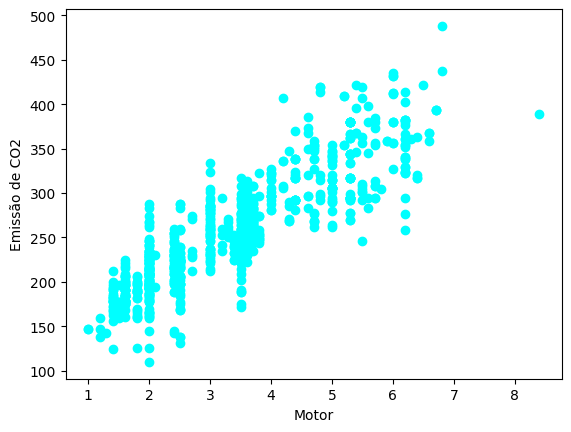

In [17]:
plt.scatter(motores_treino, co2_treino, color='aqua')
plt.xlabel('Motor')
plt.ylabel('Emissão de CO2')
plt.show()

Treino do Modelo

In [24]:
modelo = linear_model.LinearRegression()

modelo.fit(motores_treino, co2_treino)

print('Modelo de regressão linear: ', modelo.coef_[0][0], 'x +', modelo.intercept_[0] )

Modelo de regressão linear:  38.992978724434074 x + 126.28970217408721


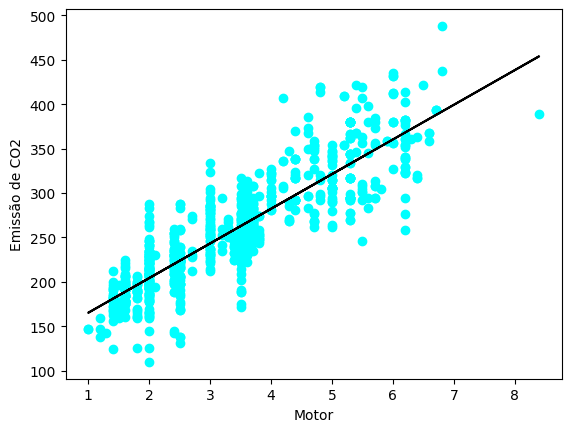

In [25]:
plt.scatter(motores_treino, co2_treino, color='aqua')
plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '#000')
plt.xlabel('Motor')
plt.ylabel('Emissão de CO2')
plt.show()